# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as scipy
from numpy.random import seed
medical = pd.read_csv('C:\\Users\\krish\\Documents\\Data Science\\EDA_case_study_01\\1585247986_Frequentist_Case_Study\\Frequentist Case Study\\insurance2.csv')


In [124]:
medical.shape

(1338, 8)

In [125]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

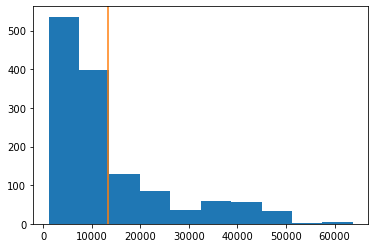

In [126]:
plt.hist(medical.charges)
mc_mean = medical.charges.mean()
plt.axvline(mc_mean,c='C1')
mc_std = medical.charges.std()
mc_var = medical.charges.var()

In [127]:
def samplemean(n=1000):
    return pd.DataFrame({'chargemean':[np.mean(np.random.choice(medical.charges,size=10)) for i in range(n)]})

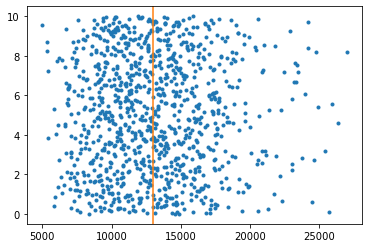

In [128]:
s1 = samplemean()
sm_mean = np.mean(s1.chargemean)
sm_std = np.std(s1.chargemean)
plt.plot(s1.chargemean,np.linspace(0,10,len(s1.chargemean)),marker='.',linestyle='none')
plt.axvline(sm_mean,c='C1')

(array([ 42., 139., 214., 202., 191., 120.,  47.,  23.,  16.,   6.]),
 array([ 4985.38814  ,  7184.4015181,  9383.4148962, 11582.4282743,
        13781.4416524, 15980.4550305, 18179.4684086, 20378.4817867,
        22577.4951648, 24776.5085429, 26975.521921 ]),
 <a list of 1 Patch objects>)

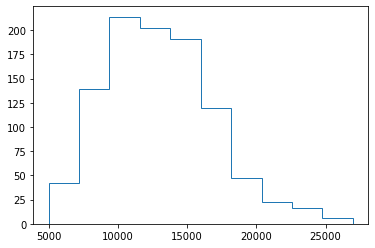

In [129]:
plt.hist(s1.chargemean,histtype='step',bins=10)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

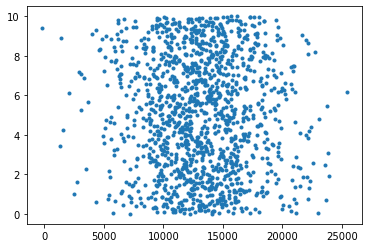

In [130]:
#from the above we can say that the random choice mean follows a normal distribution so we define a normal distribution or a t distribution
df = len(s1.chargemean)-1
t.stats(df,loc=sm_mean,scale=sm_std)

trvs = t.rvs(df,loc=sm_mean,scale=sm_std,size=len(medical.charges))
plt.plot(trvs,np.linspace(0,10,len(medical.charges)),marker='.',linestyle='none')

In [131]:
np.percentile(trvs,[2.5,97.5]) #If it is a two sided interval.

array([ 5570.65388484, 20960.53352952])

In [132]:
#so we can confidently state that, the mean of the charges in total will not go below 12000

__A:__

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [133]:
#This should be a one sided confidence interval. Specifically its a left sided confidence interval.

__A:__

In [134]:
np.percentile(trvs,5) #95%

6623.805497682583

In [135]:
#so we can confidently state that, the mean of the charges in total will not go below 12000, so the administrator neednt be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

In [136]:
#t-statistic is how far away a sample is from the assumed null hypothesis. That is to say how far away are the two groups 
#"with insurance" and group "without insurance". If there isn't much difference their mean would be same. That is x0 and x1
#would be same and t = 0. The greater the difference between the greater is the magnitude of t-statistic and the sign of the
#t -statistic shows in which direction the magnitude is greater.
#sp is nothing but the sum of variance of individual groups divided by the volume of sample.
# t-statistic is inversely proportional to sp here, naturally if sp(pooled standard deviation) if its high then it is acceptable
#to have values far away from the mean, that is the range of the data is large. So, t statistic is an apt measure.

In [137]:
#Null Hypothesis (h0) : There is no relationship between charges and insurance. #(t=0, x0 = x1, provided n0=n1)
#Alternate Hypothesis(ha) : there is a relationship and charges vary depending on wheather insurance is available.

In [138]:
withInsurance = medical[medical.insuranceclaim==1]
withoutInsurance = medical[medical.insuranceclaim==0]
n0 = len(withInsurance)
n1 = len(withoutInsurance)
s0 = np.std(withInsurance.charges)
s1 = np.std(withoutInsurance.charges)
sp = np.sqrt(((n0-1)*np.square(s0) + (n1-1)*np.square(s1))/(n0+n1-2))
x0 = np.mean(withInsurance.charges)
x1= np.mean(withoutInsurance.charges)
t = (x0-x1)/(sp*(np.sqrt((1/n0)+1/n1)))
sp,t

(11512.282899205744, 11.901306943555385)

__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [139]:
scipy.stats.ttest_ind(withInsurance.charges,withoutInsurance.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [140]:
#We reject the null hypothesis!

In [141]:
#t-statistic of 11.8932 says that the groups are significantly different and a p value of 4.46 states that the probability
#of ending up with a sample as our current sample is quite high. There for it is safe to say that people with insurance are charged 
#different than the people without insurance. SInce the sign of t-statistic is positive. We can say that people with insurance are
#charged more than the people without insurance significantly.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

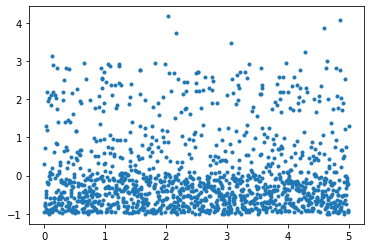

In [142]:
zscores = scipy.stats.zscore(medical.charges)
zscores
plt.plot(np.linspace(0,5,len(zscores)),zscores,marker='.',linestyle='none')

In [143]:
#shows many zscores below 0 and close to -1, which means most of the time patients are charged less than the mean of the sample
#data. This is the population standard deviation
print(mc_std, mc_mean)
mc_mean - mc_std
# A large number of patients are charged between 1160(-1) and 13270(0), the charges are more spread above 13270. 

12110.011236693994 13270.422265141257


1160.4110284472627

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test